# Prior/Posterior Spline

In [7]:
import numpy as np
from scipy import integrate, stats, interpolate
from toolbox import vis
import urllib

# ex. 1 

In [77]:
#M total number
k = 10#
K = 100#number of type I objects
d = 60 #number of drawn objects without replacement
N = np.arange(100,3000)
def hypergeom_flat(N, k = 10): return stats.hypergeom.pmf(k, N, K, d)#*k/M  #Normalization!!!

In [78]:
index = np.argmax(hypergeom(N))
N[index]

100

In [62]:
np.sum(hypergeom(M))

66.65979176991313

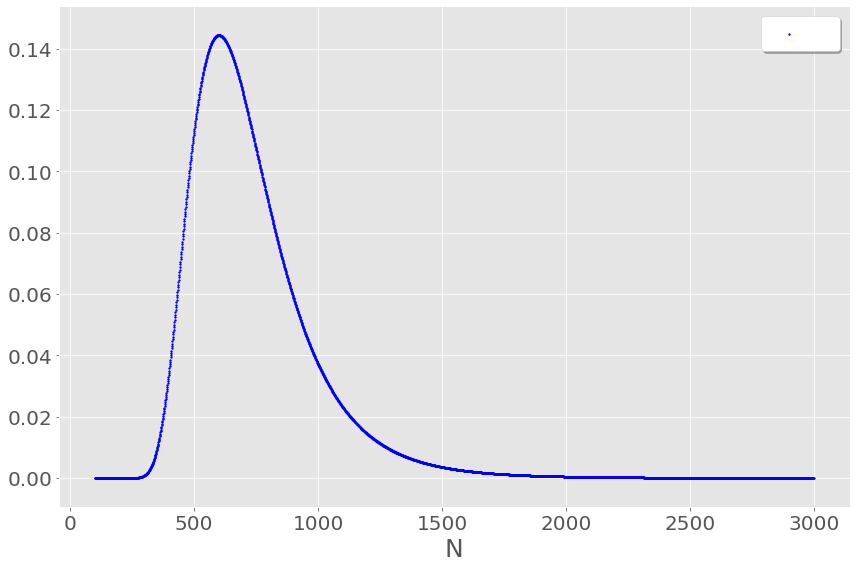

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9dae908c50>,
 <Figure size 864x576 with 1 Axes>)

In [64]:
vis.nice_plot(M, hypergeom_flat(M), figsize = (12,8), scatter = True, xlabel = 'N')

# ex. 2 

In [65]:
def hypergeom(M, k = 10): return stats.hypergeom.pmf(k, M, n, N)*1/M  #Normalization!!!

In [68]:
#for flat priors they are the same

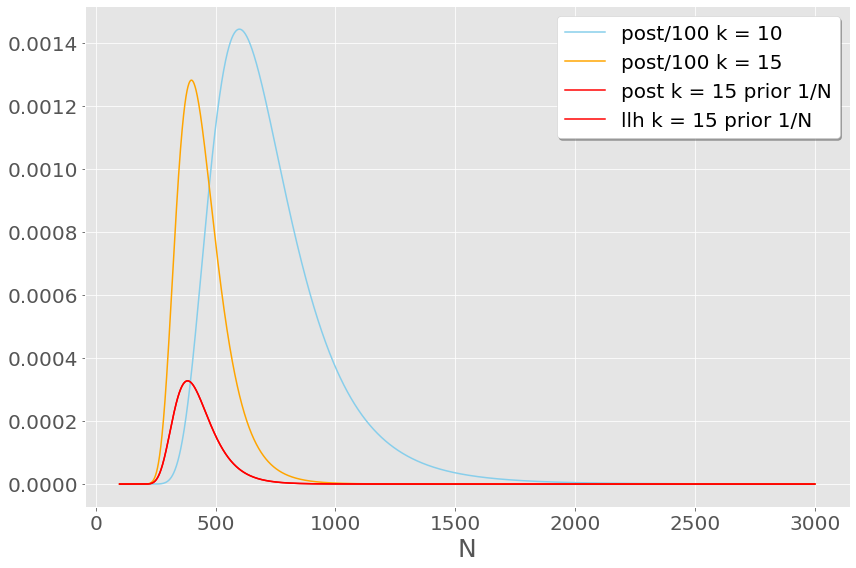

In [67]:
ax, fig = vis.nice_plot(M, hypergeom_flat(M)/100, figsize = (12,8), xlabel = 'N', show_plot=False, color = 'skyblue',
                       data_label = 'post/100 k = 10')
ax, fig = vis.nice_plot(M, hypergeom_flat(M, k= 15)/100, figsize = (12,8), xlabel = 'N', show_plot=False, axis = ax, 
              figure = fig, color = 'orange', data_label='post/100 k = 15')
ax, fig = vis.nice_plot(M, hypergeom(M, k= 15), figsize = (12,8),  xlabel = 'N', show_plot=False, axis = ax, 
              figure = fig, color = 'red', data_label='post k = 15 prior 1/N')
ax, fig = vis.nice_plot(M, hypergeom(M, k= 15), figsize = (12,8),  xlabel = 'N', show_plot=False, axis = ax, 
              figure = fig, color = 'red', data_label='llh k = 15 prior 1/N')

fig

In [103]:
v, sv = 10, 1
V, sV = 5e3, 3e2
sN = np.sqrt((sv*V/v**2)**2 + (sV/v)**2)
muN = V/v

In [83]:
d = 30
K = 50
def hypergeom_llh(N, k = 4): return stats.hypergeom.pmf(k, N, K, d)
def hypergeom_gprior(N, k = 4): return stats.hypergeom.pmf(k, N, K, d)*stats.norm.pdf(N, loc = muN, scale = sN)

In [94]:
N = np.arange(120,2000)

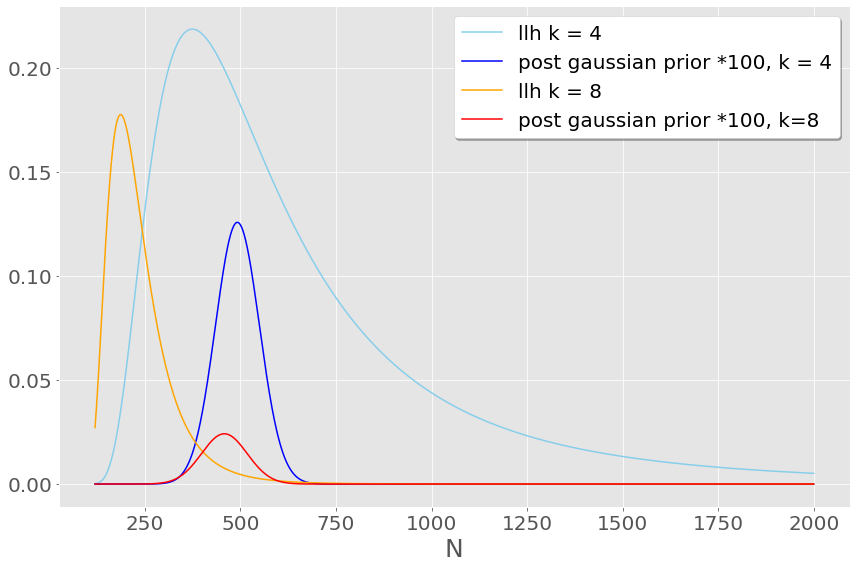

In [101]:
ax, fig = vis.nice_plot(N, hypergeom_llh(N), figsize = (12,8), xlabel = 'N', show_plot=False, color = 'skyblue',
                       data_label = 'llh k = 4')
ax, fig = vis.nice_plot(N, hypergeom_gprior(N)*100, figsize = (12,8), xlabel = 'N', show_plot=False, axis = ax, 
              figure = fig, color = 'blue', data_label='post gaussian prior *100, k = 4')
ax, fig = vis.nice_plot(N, hypergeom_llh(N, k = 8), figsize = (12,8), xlabel = 'N', show_plot=False, color = 'orange',
                       data_label = 'llh k = 8', axis = ax, figure = fig)
ax, fig = vis.nice_plot(N, hypergeom_gprior(N, k = 8)*600, figsize = (12,8), xlabel = 'N', show_plot=False, axis = ax, 
              figure = fig, color = 'red', data_label='post gaussian prior *100, k=8')
fig

# Ex. 4 

In [114]:
from scipy import interpolate
from toolbox import as_toolbox as ast
import urllib

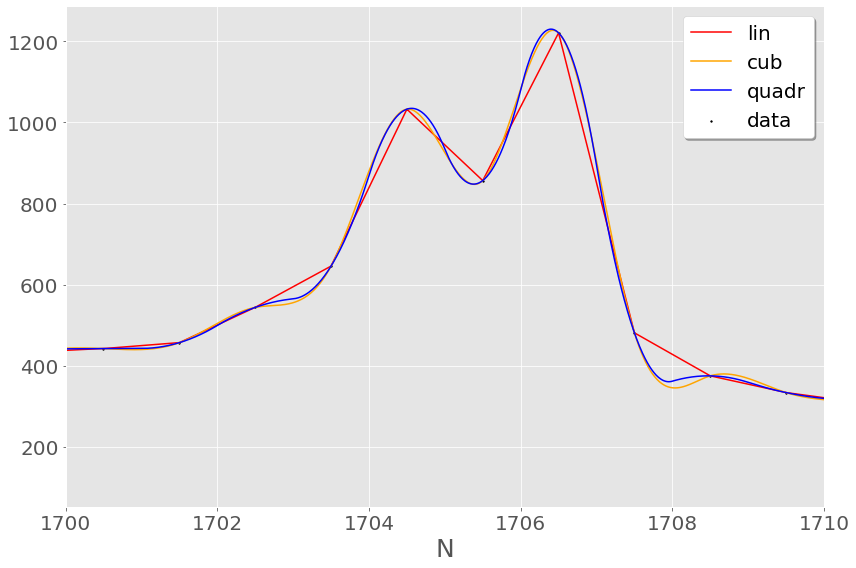

In [154]:
url = 'https://www.nbi.dk/~koskinen/Teaching/data/DustLog_forClass.dat'
f = urllib.request.urlopen(url)
data = np.loadtxt(f)
x, y = data[:,0], data[:,1]
x_range = [1700, 1710]
x_lin = np.linspace(1700,1710,1000)
ax, fig = vis.nice_plot(x, y, figsize = (12,8), xlabel = 'N', show_plot=False, scatter = True, color = 'k', data_label='data',
                        x_show_range = x_range)
f_lin = interpolate.interp1d(x, y)
f_quadr = interpolate.interp1d(x, y, 'quadratic')
f_cub = interpolate.interp1d(x, y, 'cubic')
ax, fig = vis.nice_plot(x_lin, f_lin(x_lin), figsize = (12,8), x_show_range = x_range,xlabel = 'N', show_plot=False, scatter = False, color = 'r', data_label='lin',
                       axis = ax, figure = fig)
ax, fig = vis.nice_plot(x_lin, f_cub(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,show_plot=False, scatter = False, color = 'orange', data_label='cub',
                       axis = ax, figure = fig)
ax, fig = vis.nice_plot(x_lin, f_quadr(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,show_plot=False, scatter = False, color = 'blue', data_label='quadr',
                       axis = ax, figure = fig)
fig

# Ex. 4 

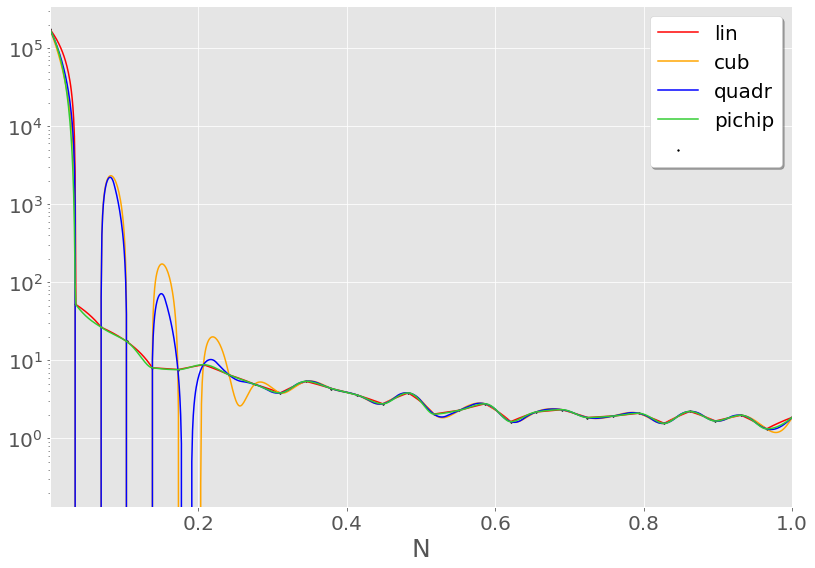

In [188]:
url = 'https://www.nbi.dk/~koskinen/Teaching/data/SplineCubic.txt'
f = urllib.request.urlopen(url)
data = np.loadtxt(f)
x, y = data[:,0], data[:,1]
x_range = [x.min(), x.max()]
x_lin = np.linspace(x.min(),x.max(),1000)
f_lin = interpolate.interp1d(x, y)
f_cub = interpolate.interp1d(x, y, 'cubic')
f_quadr = interpolate.interp1d(x, y, 'quadratic')
f_pichip = interpolate.PchipInterpolator(x, y)
ax, fig = vis.nice_plot(x, y, figsize = (12,8), show_plot=False, scatter = True, color = 'k')
ax, fig = vis.nice_plot(x_lin, f_lin(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,
                        show_plot=False, scatter = False, color = 'red', data_label='lin',
                        axis = ax, figure = fig)
ax, fig = vis.nice_plot(x_lin, f_cub(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,
                        show_plot=False, scatter = False, color = 'orange', data_label='cub',
                        axis = ax, figure = fig)
ax, fig = vis.nice_plot(x_lin, f_quadr(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,show_plot=False, scatter = False, color = 'blue', data_label='quadr',
                       axis = ax, figure = fig)
ax, fig = vis.nice_plot(x_lin, f_pichip(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,show_plot=False, scatter = False, color = 'limegreen', data_label='pichip',
                       axis = ax, figure = fig)

ax.set_yscale('log')
fig

In [174]:
xmin, xmax = 1e-5, 0.01
int_quad = integrate.quad(f_quadr, xmin, xmax)
int_lin = integrate.quad(f_lin, xmin, xmax)
int_cub = integrate.quad(f_cub, xmin, xmax)
int_lin, int_quad, int_cub

((1493.3982827723833, 1.65800515846957e-11),
 (1373.8929579683593, 1.525327595306835e-11),
 (1313.2548778155267, 1.4580058025520943e-11))

# Ex. 3 

In [25]:
from scipy.interpolate import splev, splrep

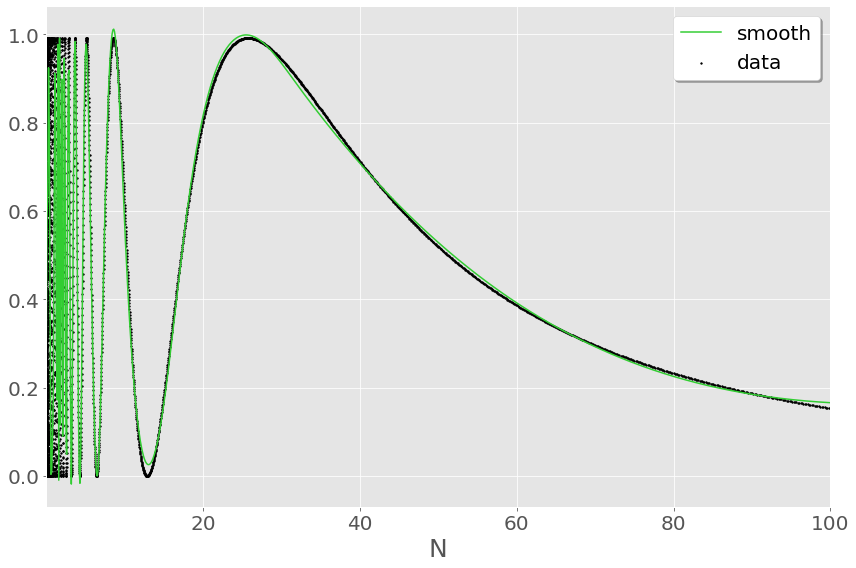

In [103]:
url = 'https://www.nbi.dk/~koskinen/Teaching/data/SplineOsc1.txt'
f = urllib.request.urlopen(url)

data = np.loadtxt(f)
x, y = data[:,0], data[:,1]
x_range = (x.min(), x.max())
f_cub = interpolate.interp1d(x, y, 'cubic')
f_pichip = interpolate.PchipInterpolator(x, y)
mask = ((x>x_range[0]) & (x<x_range[1]))
f_spl = interpolate.UnivariateSpline(x[mask], y[mask], s = 180)
y_spl = f_spl(x_lin)

ax, fig = vis.nice_plot(x, y, figsize = (12,8), xlabel = 'N', show_plot=False, scatter = True, color = 'k', data_label='data', x_show_range = x_range)
x_lin = np.linspace(*x_range,1000)
cub = False
pichip = False
smooth = True
if cub:
    ax, fig = vis.nice_plot(x_lin, f_cub(x_lin), figsize = (12,8), xlabel = 'N', x_show_range = x_range,
                            show_plot=False, scatter = False, color = 'orange', data_label='cub',
                            axis=ax, figure = fig)
if pichip:
    ax, fig = vis.nice_plot(x_lin, f_pichip(x_lin, 3), figsize = (12,8), xlabel = 'N', x_show_range = x_range,show_plot=False, scatter = False, color = 'limegreen', data_label='pichip',
                           axis = ax, figure = fig)
if smooth:
    ax, fig = vis.nice_plot(x_lin, y_spl, figsize = (12,8), xlabel = 'N', x_show_range = x_range,show_plot=False, scatter = False, color = 'limegreen', data_label='smooth',
                               axis = ax, figure = fig)

fig

# Extra 

In [147]:
import importlib
import toolbox
importlib.reload(toolbox.as_toolbox)
import toolbox.as_toolbox as ast

In [151]:
url  = 'https://www.nbi.dk/~koskinen/Teaching/data/honda2012_spl_solmin.d'
Data = ast.load_url_data(url)
D = np.array(Data[0])
for i in range(len(Data)):
    D = np.concatenate((D, Data[i]))